In [1]:
import cv2
import os
import numpy as np
import random
from PIL import Image, ImageOps
import torch
import torch.nn.functional as F
from torchvision import transforms
import torchvision.transforms.functional as TF

In [2]:
def stack_imgs(imgs):
    ## get first ch because in this case three channel are the same
    list_img_one_ch = [img[0] for img in imgs] 
    res = torch.stack(list_img_one_ch, dim=0)
    return res

In [3]:
filename = "../test_data/test_imgs_multi_with_nuclei/23/"

if os.path.isdir(filename):

    img = []
    nuclei_img = []

    for f in os.listdir(filename):
        if not (f.startswith('.')):
            if 'DAPI' in f:
                nuclei_img.append(np.asarray(Image.open(os.path.join(filename,f))))
            else:
                img.append(Image.open(os.path.join(filename,f)))

    random.shuffle(img)

In [4]:
full_imgs = img

In [5]:
## Normalize & stack data
norm_imgs = []

for full_img in full_imgs:

    img_tf = TF.to_tensor(full_img)

    mean, std = img_tf.mean([1,2]), img_tf.std([1,2])

    transform_norm = transforms.Compose([
        transforms.ToTensor(),
        #transforms.Normalize(mean, std),
    ])

    _img = transform_norm(full_img)
    #_img = _img.to(device=device, dtype=torch.float32)

    norm_imgs.append(_img)

img = stack_imgs(norm_imgs)
img = img.unsqueeze(0)

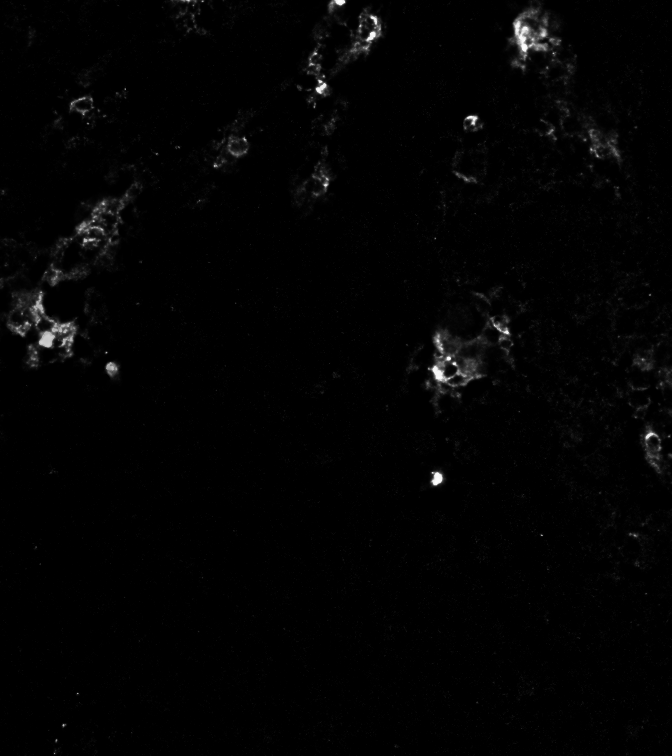

In [6]:
new_img_PIL = transforms.ToPILImage()(img[0][0])
new_img_PIL

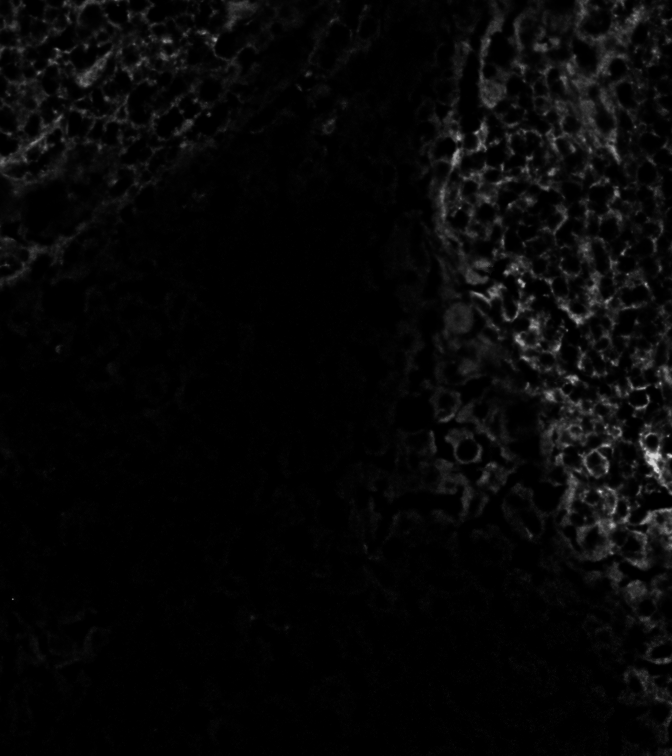

In [7]:
new_img_PIL = transforms.ToPILImage()(img[0][1])
new_img_PIL

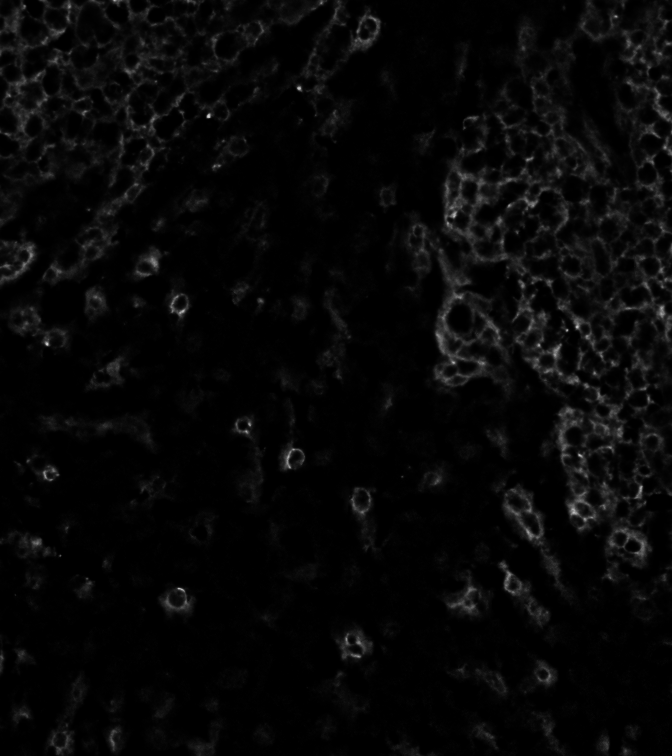

In [8]:
new_img_PIL = transforms.ToPILImage()(img[0][2])
new_img_PIL

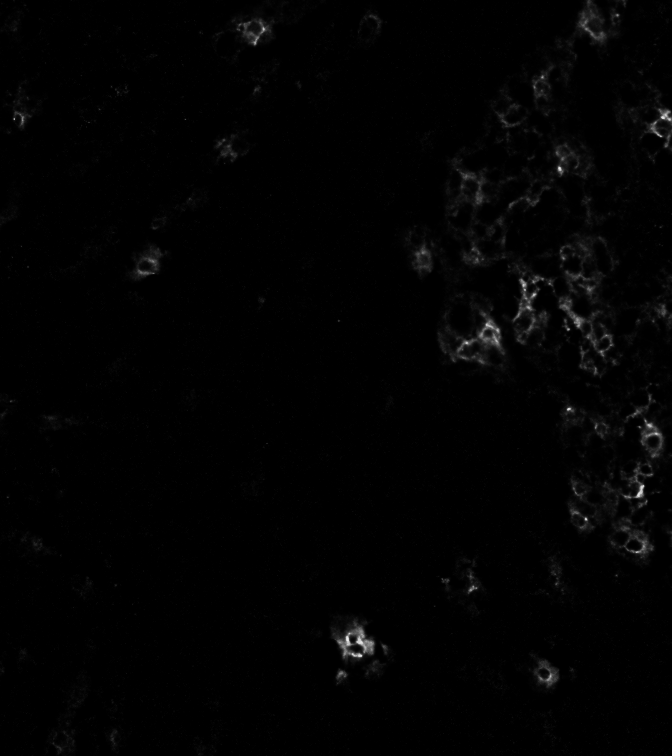

In [9]:
new_img_PIL = transforms.ToPILImage()(img[0][3])
new_img_PIL

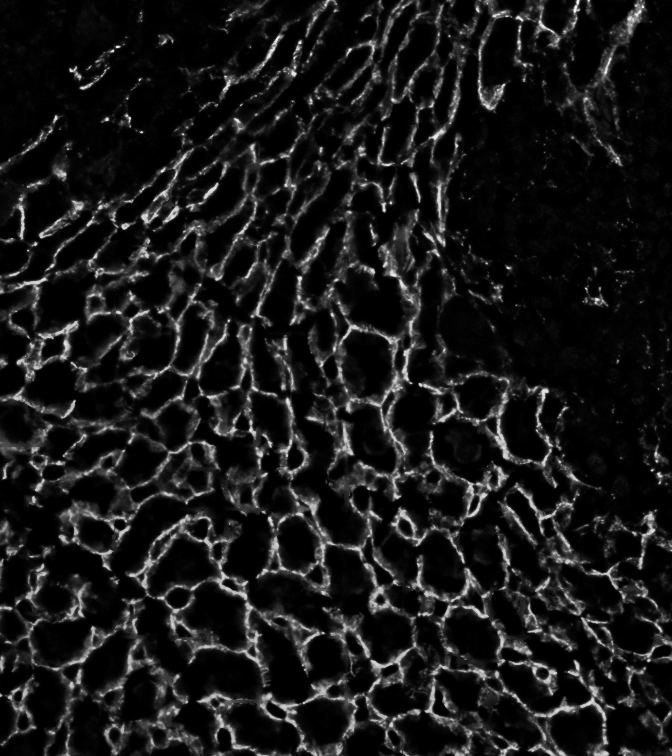

In [10]:
new_img_PIL = transforms.ToPILImage()(img[0][4])
new_img_PIL

In [11]:
pooling_result = torch.max(img,1)[0].unsqueeze(1)

In [12]:
pooling_result.shape

torch.Size([1, 1, 756, 672])

In [13]:
pooling_result_viz = transforms.ToPILImage()(pooling_result[0][0])

In [15]:
pooling_result_viz.save("stack_img_23.png")